<a href="https://colab.research.google.com/github/SWAT-Brasil/util/blob/master/tutorial_pcpswat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial para uso de pcpswat.py

O pacote pcpswat contém diversas funções para processamento da precipitação para uso no SWAT. Este notebook contém informações para uso do pacote.

O pacote requer alguns módulos especiais para python, que geralmente podem ser instalados mais facilmente utilizando o gerenciador de pacodes anaconda. Alguns pacotes necessários para algumas funcões especiais são:
1. Pandas
2. Numpy
3. Scipy
4. Geopandas: esse pode ser chatinho de instalar. Ele é necessário somente caso seja utilizado arquivos shape

Caso não deseje instalar python e seus pacotes voce pode utilizar estas rotinas no google colab

Utilize ```SHIFT+ENTER``` para executar a célula.

In [8]:
# Verifica se esta rodando no COLAB e instala dependencias
def init_colab_env():
  """ prepara ambiente para uso no COLAB. Isso nao e necessario para
  uso local
  """
  !pip install geopandas
  !git clone https://github.com/SWAT-Brasil/util.git
  !cp util/pcpswat/pcpswat.py .
  !mkdir test
  !cp -r util/pcpswat/test/* ./test

running_in_colab = 'google.colab' in str(get_ipython())
if running_in_colab:
  init_colab_env()

# Carrega pacotes do python. Voce pode instalar com o pip ou utilizando anaconda. Anaconda é mais amigavel para uso e instalação dos pacotes, e funciona bem em windows/linux
%matplotlib inline
import geopandas as gpd
import pyproj
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pcpswat

fatal: destination path 'util' already exists and is not an empty directory.
mkdir: cannot create directory ‘test’: File exists


# Interpolação

In [9]:
# Caminho para arquivos de entrada e diretorio de saida
# Neste diretorios estão alguns arquivos de exemplo
shape_file = './test/shape/subs1.shp'
index_file = './test/pcp/pcp.txt'
output_folder = './test/out'

In [10]:
# Le shapefile e obtem os centroides
# TODO: verificar se o waring é valido ou não neste caso
pts_to_interpolate, shape = pcpswat.get_centroid_from_shape(shape_file)

/content/pcpswat.py:112: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = shape.centroid
/content/pcpswat.py:113: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pts_to_interpolate = np.array(list(shape.centroid.map(lambda p: [p.x, p.y])))


In [11]:
# Carrega dados observados
observed_data_index, observed_data, observed_pts = pcpswat.read_pcp(index_file)

Lendo ./test/pcp/pcp.txt
Lendo ./test/pcp/p83076.txt
Lendo ./test/pcp/p83179.txt
Lendo ./test/pcp/p83235.txt
Lendo ./test/pcp/p83236.txt
Lendo ./test/pcp/p1045006.txt
Lendo ./test/pcp/p1143005.txt
Lendo ./test/pcp/p1144005.txt
Lendo ./test/pcp/p1144027.txt
Lendo ./test/pcp/p1145001.txt
Lendo ./test/pcp/p1145004.txt
Lendo ./test/pcp/p1145013.txt
Lendo ./test/pcp/p1145014.txt
Lendo ./test/pcp/p1145019.txt
Lendo ./test/pcp/p1145020.txt
Lendo ./test/pcp/p1244011.txt
Lendo ./test/pcp/p1244019.txt
Lendo ./test/pcp/p1245004.txt
Lendo ./test/pcp/p1245014.txt
Lendo ./test/pcp/p1245015.txt
Lendo ./test/pcp/p1245016.txt


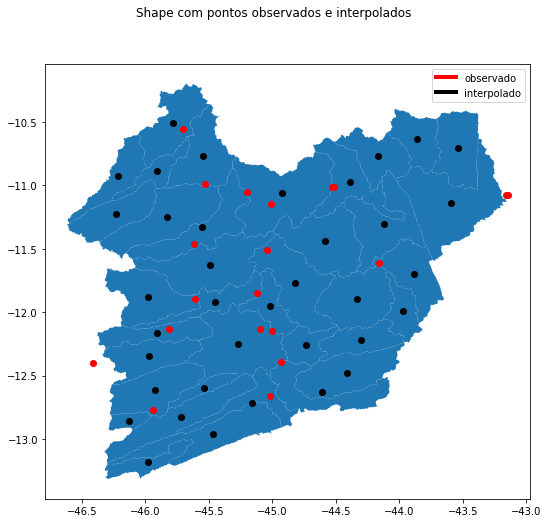

In [16]:
# Mostra figura com shape e pontos observados e centroides
f, ax = plt.subplots(1,figsize=(15,8))
f.suptitle('Shape com pontos observados e interpolados')
pcp_pts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(observed_pts[:,0],observed_pts[:,1]))
ipcp_pts = gpd.GeoDataFrame(geometry=gpd.points_from_xy(pts_to_interpolate[:,0],pts_to_interpolate[:,1]))
shape.plot(ax=ax)
pcp_pts.plot(ax=ax, color='red')
ipcp_pts.plot(ax=ax, color='black')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='black', lw=4)]

#fig, ax = plt.subplots()
#lines = ax.plot(data)
ax.legend(custom_lines, ['observado','interpolado'])

In [17]:
# Interpolação
interpolated_data = pcpswat.interpolate(observed_pts, observed_data, pts_to_interpolate, method='nearest')

nearest |##################################################| 100.0% 


In [18]:
# Gera e salva pcp.txt para interpolado
output_folder = './test/out'
# Cria dados de indice para precipitacao interpolada    
interpolated_index = pcpswat.create_pcp_index(pts_to_interpolate)
# salva indice e dados interpolados
pcpswat.save_pcp(interpolated_index, interpolated_data, output_folder)

Salvando ./test/out/pcp.txt
Salvando ./test/out/ipcp0001.txt
Salvando ./test/out/ipcp0002.txt
Salvando ./test/out/ipcp0003.txt
Salvando ./test/out/ipcp0004.txt
Salvando ./test/out/ipcp0005.txt
Salvando ./test/out/ipcp0006.txt
Salvando ./test/out/ipcp0007.txt
Salvando ./test/out/ipcp0008.txt
Salvando ./test/out/ipcp0009.txt
Salvando ./test/out/ipcp0010.txt
Salvando ./test/out/ipcp0011.txt
Salvando ./test/out/ipcp0012.txt
Salvando ./test/out/ipcp0013.txt
Salvando ./test/out/ipcp0014.txt
Salvando ./test/out/ipcp0015.txt
Salvando ./test/out/ipcp0016.txt
Salvando ./test/out/ipcp0017.txt
Salvando ./test/out/ipcp0018.txt
Salvando ./test/out/ipcp0019.txt
Salvando ./test/out/ipcp0020.txt
Salvando ./test/out/ipcp0021.txt
Salvando ./test/out/ipcp0022.txt
Salvando ./test/out/ipcp0023.txt
Salvando ./test/out/ipcp0024.txt
Salvando ./test/out/ipcp0025.txt
Salvando ./test/out/ipcp0026.txt
Salvando ./test/out/ipcp0027.txt
Salvando ./test/out/ipcp0028.txt
Salvando ./test/out/ipcp0029.txt
Salvando ./test

### Visualização da interpolação em grid
Aqui tem um exemplo para apresentar o resultado da interpolãção em formato de uma imagem. Isso não deve ser de uso normal, mas é legal para ver o resultado. Isso é um pouco mais complicado que o uso normal, e é dividido em 3 etapas: definição de pontos a sererm interpolados com a grade, rearranjo dos dados observados e rearranjo do dados interpolados para apresenteção.

In [19]:
# Preparação do grid para definir os pontos que devem ser interpolados

# numero de divisoes da grid (para x e y)
grid_n = 100
# encontra limites da area a ser interpolada
x_min, y_min, x_max, y_max = shape.total_bounds
ox_min, oy_min, ox_max, oy_max = pcp_pts.total_bounds
if ox_min < x_min:
    x_min = ox_min
if oy_min < y_min:
    y_min = oy_min
if ox_max > x_max:
    x_max = ox_max
if oy_max > y_max:
    y_max = oy_max
# aplica margens
margin_x = (0.05 * (x_max - x_min))
margin_y = (0.05 * (y_max - y_min))
x_max += margin_x
y_max += margin_y
x_min -= margin_x
y_min -= margin_y

# Gera grid
grid_x, grid_y = np.mgrid[x_min:x_max:grid_n*1j, y_min:y_max:grid_n*1j]
# transforma grid de pontos para sequencia de pontos (x,y)
grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

In [20]:
# Prepara dados de entrada para somente 1 ponto temporal

# valor do index equivalente ao tempo para ser apresentado
index = 0
print('Ponto a ser interpolado: {}'.format(observed_data[0].index[index]))

# recorta somente os dados que equivalente ao tempo index
sliced_observed_data = np.array(observed_data).T[index].reshape(-1,1)
# ajusta formato dos dados
sliced_observed_data = pd.DataFrame(sliced_observed_data.T)
sliced_observed_data = [sliced_observed_data[col] for col in sliced_observed_data]

Ponto a ser interpolado: 2000-01-01 00:00:00


In [21]:
# Interpola
interpolated = pcpswat.interpolate(observed_pts, sliced_observed_data, grid_points, method='idw')

idw |##################################################| 100.0% 


In [22]:
# ajusta formato de saida
interpolated = interpolated.to_numpy()
# converte saida para formato de imagem
interpolated = interpolated[0].reshape(grid_n, grid_n)

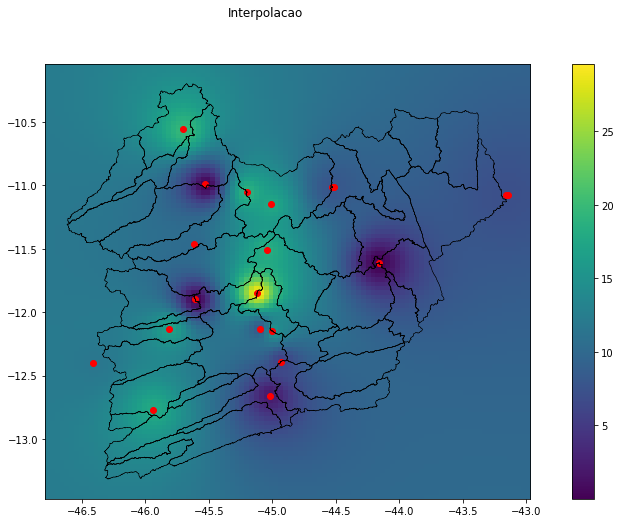

In [23]:
# Apresenta inteprolacao
f, ax = plt.subplots(1,figsize=(15,8))
f.suptitle('Interpolacao')
# mapa de cores da interpolacao
extent = [x_min, x_max, y_min, y_max]
plt.imshow(interpolated.T,extent=extent, origin='lower')
plt.colorbar()

# shape com os contornos
shape.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 0.5,ax=ax)

# Pontos observados
pcp_pts.plot(ax=ax, color='red')

## Exemplo na linha de comando
Também é possivel utilizar o pcpswat diretamente na linha de comando para fazer a interpolação. Retire a exclamação do inicio caso utilize diretamente na linha de comando.

In [24]:
# help
!python pcpswat.py -h

Ferramenta de interpolacao de precipitacao para SWAT 0.1.0
usage: pcpswat.py [-h] [-shape SHAPE] [-interpolate INTERPOLATE]
                  [-method METHOD] [-savefig]
                  pcp_file destination_folder

Ferramenta de interpolação de precipitação para SWAT

positional arguments:
  pcp_file              pcp index file
  destination_folder    destination folder

optional arguments:
  -h, --help            show this help message and exit
  -shape SHAPE          shape file para obter o centroide automaticamente
  -interpolate INTERPOLATE
                        arquivo com os pontos a serem interpolados
  -method METHOD        metodo de interpolacao
  -savefig              salva arquivo com imagem dos pontos observados,
                        interpolados e shape


In [25]:
# Exemplo para interpolar com pontos fornecidos manualmente (-interpolate) e define o metodo de interpolacao como nearest
!python pcpswat.py ./test/pcp/pcp.txt ./test/out/ -interpolate ./test/pcp/pcp_to_interpolate.txt -method 'nearest'

Ferramenta de interpolacao de precipitacao para SWAT 0.1.0
Pontos a interpolar definidos manualmente
Lendo ./test/pcp/pcp_to_interpolate.txt
Carregando dados de precipitacao
Lendo ./test/pcp/pcp.txt
Lendo ./test/pcp/p83076.txt
Lendo ./test/pcp/p83179.txt
Lendo ./test/pcp/p83235.txt
Lendo ./test/pcp/p83236.txt
Lendo ./test/pcp/p1045006.txt
Lendo ./test/pcp/p1143005.txt
Lendo ./test/pcp/p1144005.txt
Lendo ./test/pcp/p1144027.txt
Lendo ./test/pcp/p1145001.txt
Lendo ./test/pcp/p1145004.txt
Lendo ./test/pcp/p1145013.txt
Lendo ./test/pcp/p1145014.txt
Lendo ./test/pcp/p1145019.txt
Lendo ./test/pcp/p1145020.txt
Lendo ./test/pcp/p1244011.txt
Lendo ./test/pcp/p1244019.txt
Lendo ./test/pcp/p1245004.txt
Lendo ./test/pcp/p1245014.txt
Lendo ./test/pcp/p1245015.txt
Lendo ./test/pcp/p1245016.txt
Interpolando...
nearest |##################################################| 100.0% 
Salvando dados interpolados
Salvando ./test/out/pcp.txt
Salvando ./test/out/aaaaa.txt
Salvando ./test/out/bbbbb.txt
Salvando

In [26]:
# Interpola utilizando as centroids do arquivo shape e salva um figura com o shape e pontos observado e interpolados, e utiliza metodo idw
!python pcpswat.py ./test/pcp/pcp.txt ./test/out/  -shape ./test/shape/subs1.shp -savefig -method 'idw'

Ferramenta de interpolacao de precipitacao para SWAT 0.1.0
Obtendo pontos a interpolar do arquivo shape
Carregando dados de precipitacao
Lendo ./test/pcp/pcp.txt
Lendo ./test/pcp/p83076.txt
Lendo ./test/pcp/p83179.txt
Lendo ./test/pcp/p83235.txt
Lendo ./test/pcp/p83236.txt
Lendo ./test/pcp/p1045006.txt
Lendo ./test/pcp/p1143005.txt
Lendo ./test/pcp/p1144005.txt
Lendo ./test/pcp/p1144027.txt
Lendo ./test/pcp/p1145001.txt
Lendo ./test/pcp/p1145004.txt
Lendo ./test/pcp/p1145013.txt
Lendo ./test/pcp/p1145014.txt
Lendo ./test/pcp/p1145019.txt
Lendo ./test/pcp/p1145020.txt
Lendo ./test/pcp/p1244011.txt
Lendo ./test/pcp/p1244019.txt
Lendo ./test/pcp/p1245004.txt
Lendo ./test/pcp/p1245014.txt
Lendo ./test/pcp/p1245015.txt
Lendo ./test/pcp/p1245016.txt
Salvando figura ./test/out/fig.png
Interpolando...
idw |##################################################| 100.0% 
Salvando dados interpolados
Salvando ./test/out/pcp.txt
Salvando ./test/out/ipcp0001.txt
Salvando ./test/out/ipcp0002.txt
Salvando